# Projeto 2 - Ciência dos Dados

## Engenharia 2A


### Gustavo Pinheiro de Carvalho
### Celina Vieira de Melo
### Gabriel Penna de Lima
### Maria Eduarda Mourão

# Descrição do projeto

Nesse projeto, devemos realizar a predição de uma variável principal, chamada de variável TARGET, em função de outras variáveis, chamadas de FEATURES, que podem influenciar em seu comportamento.

Para o desenvolvimento da nossa base de dados, criamos um Google Forms com algumas perguntas que nos ajudariam a desenvolver a análise da variável principal. 

Decidimos pegar informações básicas para conseguir um maior número de adeptos a pesquisa, pois acreditamos que quando o formulário é muito extenso e demanda muito tempo para ser preenchido, alguns participantes acabam desistindo.

Dessa forma, chegamos a nossa base de dados:

# <font color='blue'>Base de Dados: Pesquisa sobre a prática de atividades físicas</font> 

   A base de dados `"Pesquisa.xlsx"` agrupa todas as respostas dos participantes da pesquisa que realizamos, de forma que nela consta: 

Carimbo de data/hora;

Nome (OPCIONAL);

Idade;

Sexo;

Você se considera uma pessoa fisicamente ativa?;

Quantos MINUTOS de atividade física você faz durante a SEMANA?;

A pandemia influenciou a sua prática de atividades físicas?;

O que você fez para superar as barreiras que a pandemia impôs a prática de atividades físicas?;

Você sente a vontade de realizar atividades físicas em maior frequência?.

## Análise dos dados

In [2]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D


from scipy import stats

In [3]:
print(os.getcwd())

C:\Users\celin\OneDrive - Insper - Institudo de Ensino e Pesquisa\Área de Trabalho\Insper\Cdados\CD21-1\P2-CD21-1


In [4]:
dados = pd.read_excel('Pesquisa.xlsx')
dados

,Carimbo de data/hora,Nome\n,Idade,Sexo,Ativa,Minutos,Influenciou,Superar,Vontade
0,2021-05-20 10:15:08.814,Gabrielle,18,Feminino,Não,70,Sim,Comecei a fazer exercícios em casa,Talvez
1,2021-05-20 10:15:47.122,Felipe Defendi,17,Masculino,Talvez,30,Não,Outros,Sim
2,2021-05-20 10:18:40.453,Davi Bonsi,18,Masculino,Sim,300,Sim,Fiquei dependente à reabertura das academias,Sim
3,2021-05-20 10:20:29.293,Isabela Domingues,17,Feminino,Não,120,Sim,Comecei a fazer exercícios em casa,Sim
4,2021-05-20 10:20:57.775,Paola Gragnolati Fernandes,18,Feminino,Talvez,140,Sim,Comecei a fazer exercícios em casa,Não
...,...,...,...,...,...,...,...,...,...
165,2021-05-21 10:41:20.303,Zuleika Syudart de lucena feitosa,56,Feminino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim
166,2021-05-21 10:51:12.881,Daniela,19,Feminino,Sim,200,Sim,Comecei a fazer exercícios em casa,Sim
167,2021-05-21 13:07:05.650,Ticiana Hissa,43,Feminino,Sim,3000,Não,Comecei a fazer exercícios em casa,Não
168,2021-05-21 13:14:57.503,NaN,43,Masculino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim


### Carimbo de data/hora

Para a análise do nosso problema, julgamos que essa coluna não possui nenhuma relação com o objetivo que estamos buscando, portanto, resolvemos tira-lá.

In [5]:
dados = dados.drop(columns=['Carimbo de data/hora'])
dados

,Nome\n,Idade,Sexo,Ativa,Minutos,Influenciou,Superar,Vontade
0,Gabrielle,18,Feminino,Não,70,Sim,Comecei a fazer exercícios em casa,Talvez
1,Felipe Defendi,17,Masculino,Talvez,30,Não,Outros,Sim
2,Davi Bonsi,18,Masculino,Sim,300,Sim,Fiquei dependente à reabertura das academias,Sim
3,Isabela Domingues,17,Feminino,Não,120,Sim,Comecei a fazer exercícios em casa,Sim
4,Paola Gragnolati Fernandes,18,Feminino,Talvez,140,Sim,Comecei a fazer exercícios em casa,Não
...,...,...,...,...,...,...,...,...
165,Zuleika Syudart de lucena feitosa,56,Feminino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim
166,Daniela,19,Feminino,Sim,200,Sim,Comecei a fazer exercícios em casa,Sim
167,Ticiana Hissa,43,Feminino,Sim,3000,Não,Comecei a fazer exercícios em casa,Não
168,NaN,43,Masculino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim


### Nome

Para a análise do nosso problema, julgamos que essa coluna não possui nenhuma relação com o objetivo que estamos buscando, portanto, resolvemos tira-lá.

In [6]:
dados = dados.drop(columns=['Nome\n'])
dados

,Idade,Sexo,Ativa,Minutos,Influenciou,Superar,Vontade
0,18,Feminino,Não,70,Sim,Comecei a fazer exercícios em casa,Talvez
1,17,Masculino,Talvez,30,Não,Outros,Sim
2,18,Masculino,Sim,300,Sim,Fiquei dependente à reabertura das academias,Sim
3,17,Feminino,Não,120,Sim,Comecei a fazer exercícios em casa,Sim
4,18,Feminino,Talvez,140,Sim,Comecei a fazer exercícios em casa,Não
...,...,...,...,...,...,...,...
165,56,Feminino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim
166,19,Feminino,Sim,200,Sim,Comecei a fazer exercícios em casa,Sim
167,43,Feminino,Sim,3000,Não,Comecei a fazer exercícios em casa,Não
168,43,Masculino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim


### Idade

Para fazer a análise da idade das amostras contidas nos dados, decidimos analisar quais as idades que mais aparecem no nosso dataset, a média dessas idades e a distribuição delas.

Text(0.5, 1.0, 'Distribuição das Idades dos participantes')

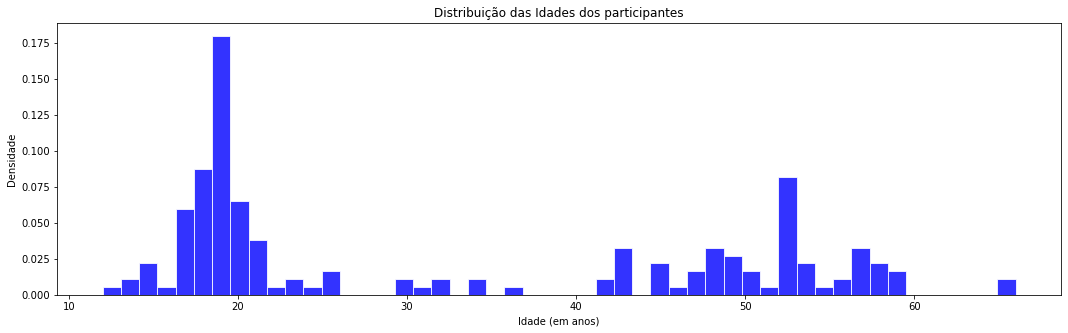

In [7]:
plt.figure(figsize=(18, 5))
plt.hist(dados['Idade'], bins=50, density=True,
color='blue', edgecolor='white',
linewidth=1, alpha=0.8)
plt.ylabel('Densidade')
plt.xlabel('Idade (em anos)')
plt.title('Distribuição das Idades dos participantes')

In [8]:
dados.Idade.describe()

count    170.000000
mean      32.523529
std       16.190509
min       12.000000
25%       19.000000
50%       21.000000
75%       49.000000
max       66.000000
Name: Idade, dtype: float64

Pela análise da distribuição das idades dos participantes da pesquisa, podemos aferir que existe uma maior concentração de amostras com idades próximas de 19 anos, que pode ser justificado pelo maior alcance que temos no público dessa idade.

Porém, obtivemos respostas de pessoas de diferentes idades, e por isso podemos repartir os nossos dados segundo faixas etárias para fazer uma análise focada especialmente em alguma dessas faixas.

#### Idade X Quantos MINUTOS de atividade física você faz durante a SEMANA

### Sexo

Acreditamos que não será necessária limpeza nessa variável pois representa algo pessoal das pessoas que participaram da nossa pesquisa.

In [9]:
dados.Sexo.value_counts(True)

Feminino     0.564706
Masculino    0.429412
Outro        0.005882
Name: Sexo, dtype: float64

<AxesSubplot:title={'center':'Sexo dos participantes'}, ylabel='Sexo'>

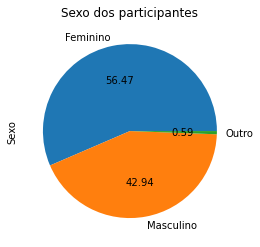

In [10]:
sexo = dados.Sexo.value_counts()
sexo.plot(kind='pie', title='Sexo dos participantes', autopct="%.2f")

### Você se considera uma pessoa fisicamente ativa?

Acreditamos que não será necessária limpeza nessa variável pois representa algo pessoal das pessoas que participaram da nossa pesquisa. Pórem, nesse caso, seremos capazes de analisar o que as pessoas julgam ser "uma pessoa fisicamente ativa", nos dando a possibilidade de observar nos dados as pessoas que realmente são fisicamente ativas e as que não são.

In [11]:
dados.Ativa.value_counts(True)

Sim       0.676471
Não       0.241176
Talvez    0.082353
Name: Ativa, dtype: float64

<AxesSubplot:title={'center':'Você se considera uma pessoa fisicamente ativa?'}, ylabel='Ativa'>

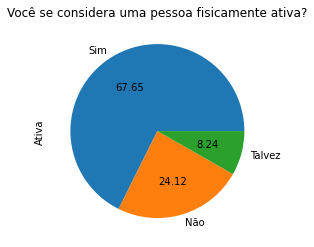

In [12]:
ativa = dados.Ativa.value_counts()
ativa.plot(kind='pie', title='Você se considera uma pessoa fisicamente ativa?', autopct="%.2f")

### Quantos MINUTOS de atividade física você faz durante a SEMANA?

Para fazer a análise do tempo destinado a atividades físicas por semana das amostras contidas nos dados, decidimos analisar quais os tempos que mais aparecem no nosso dataset, a média dessas tempos e a distribuição deles.

Text(0.5, 1.0, 'Distribuição da frequência de exercício dos participantes POR SEMANA')

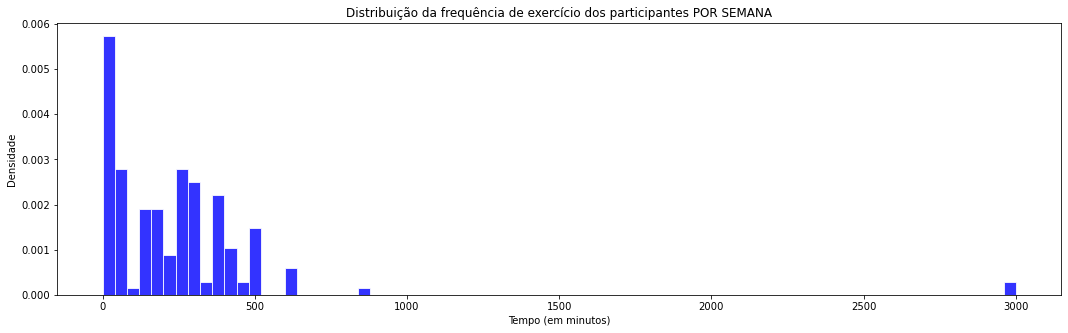

In [13]:
plt.figure(figsize=(18, 5))
plt.hist(dados['Minutos'], bins=75, density=True,
color='blue', edgecolor='white',
linewidth=1, alpha=0.8)
plt.ylabel('Densidade')
plt.xlabel('Tempo (em minutos)')
plt.title('Distribuição da frequência de exercício dos participantes POR SEMANA')

#### Dados menores que 10:

Pela análise dos dados, percebemos que essa pergunta teve um grau de dificuldade de interpretação baseado nas respostas que obtivemos, pois acreditamos que algumas amostras apresentam parâmetros diferentes do que haviamos perguntando, como VEZES que realiza exercícios durante a semana ou HORAS que realiza exercícios durante a semana.

Considerando esses possíveis erros de interpretação, decidimos contabilizar apenas os dados que apresentam um número maior que 10 minutos de exercícios físicos por semana, incluindo também as amostras que apresentaram o número 0, pois independente da interpretação, a pergunta receberia a mesma resposta.

In [14]:
menor_10_diferente_0 = dados.loc[(dados['Minutos']<10) & (dados['Minutos']!=0)]
menor_10_diferente_0


,Idade,Sexo,Ativa,Minutos,Influenciou,Superar,Vontade
13,20,Masculino,Sim,5,Sim,Outros,Sim
39,18,Feminino,Não,2,Sim,Outros,Não
44,15,Feminino,Sim,8,Sim,Comecei a fazer exercícios em casa,Talvez
46,50,Masculino,Sim,9,Sim,Comecei a fazer exercícios em casa,Não
51,19,Masculino,Não,5,Sim,Fiquei dependente à reabertura das academias,Sim
53,17,Feminino,Sim,3,Não,Fiquei dependente à reabertura das academias,Sim
54,19,Masculino,Sim,8,Sim,Comecei a fazer exercícios em casa,Sim
58,18,Feminino,Sim,7,Sim,Comecei a fazer exercícios em casa,Não
76,20,Feminino,Sim,5,Sim,Comecei a fazer exercícios em casa,Talvez
82,19,Masculino,Não,5,Sim,Fiquei dependente à reabertura das academias,Sim


In [15]:
#dados_limpo = dados.drop(menor_10_diferente_0.index)
#dados_limpo
dados = dados.drop(menor_10_diferente_0.index)
#dados

Text(0.5, 1.0, 'Distribuição da frequência de exercício dos participantes POR SEMANA')

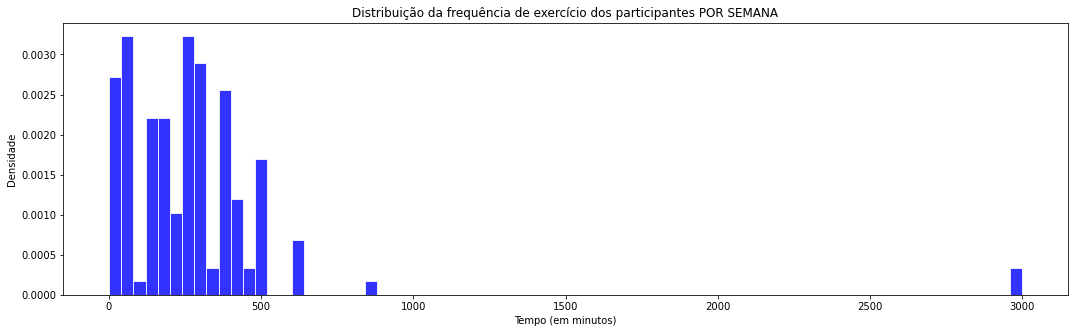

In [16]:
plt.figure(figsize=(18, 5))
plt.hist(dados['Minutos'], bins=75, density=True,
color='blue', edgecolor='white',
linewidth=1, alpha=0.8)
plt.ylabel('Densidade')
plt.xlabel('Tempo (em minutos)')
plt.title('Distribuição da frequência de exercício dos participantes POR SEMANA')

#### Valores aberrantes:

Pela análise do histograma, podemos perceber a existência de um valor aberrante, e quando fomos analisá-lo, descobrimos que ele poderia ser um erro nas respostas do formulário, pois representa uma média de 7,14 horas por dia, algo humanamente impróvavel.

In [17]:
dados = dados.drop(dados[dados['Minutos'] > 1000].index)

Text(0.5, 1.0, 'Distribuição da frequência de exercício dos participantes POR SEMANA')

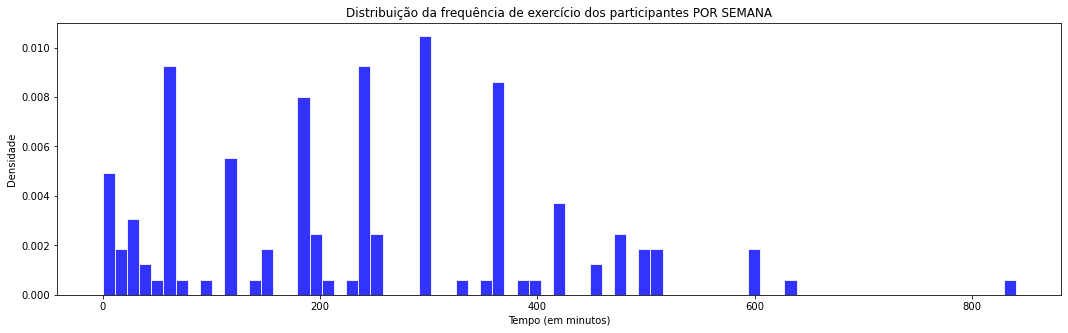

In [18]:
plt.figure(figsize=(18, 5))
plt.hist(dados['Minutos'], bins=75, density=True,
color='blue', edgecolor='white',
linewidth=1, alpha=0.8)
plt.ylabel('Densidade')
plt.xlabel('Tempo (em minutos)')
plt.title('Distribuição da frequência de exercício dos participantes POR SEMANA')

#### Descrição da variável

In [19]:
dados.Minutos.describe()

count    145.000000
mean     237.951724
std      163.763902
min        0.000000
25%      120.000000
50%      240.000000
75%      360.000000
max      840.000000
Name: Minutos, dtype: float64

Realizando uma análise dos resultados, podemos perceber que obtivemos uma média de aproximadamente 206.16 minutos de exercícios por semana, com a 

C:\Users\celin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Minutos', ylabel='Idade'>

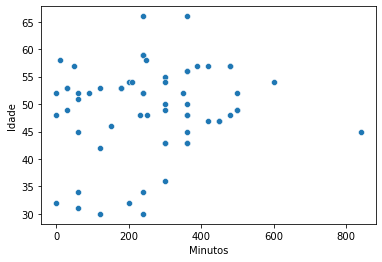

In [20]:
dados_maior28 = dados.loc[dados['Idade'] > 28, :]
dados_menor28 = dados.loc[dados['Idade'] <=28, :]


sns.scatterplot(dados_maior28['Minutos'], dados_maior28['Idade'] )


C:\Users\celin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Minutos', ylabel='Idade'>

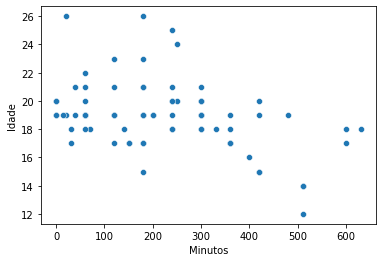

In [21]:

sns.scatterplot(dados_menor28['Minutos'], dados_menor28['Idade'])

C:\Users\celin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\celin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Minutos', ylabel='Idade'>

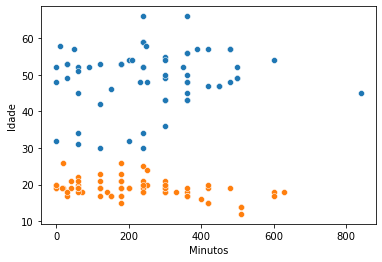

In [22]:
sns.scatterplot(dados_maior28['Minutos'], dados_maior28['Idade'])
sns.scatterplot(dados_menor28['Minutos'], dados_menor28['Idade'])

#### Quantos MINUTOS de atividade física você faz durante a SEMANA X Sexo MASCULINO

Text(0.5, 1.0, 'Distribuição do tempo de atividade dos participantes do sexo masculino por minuto')

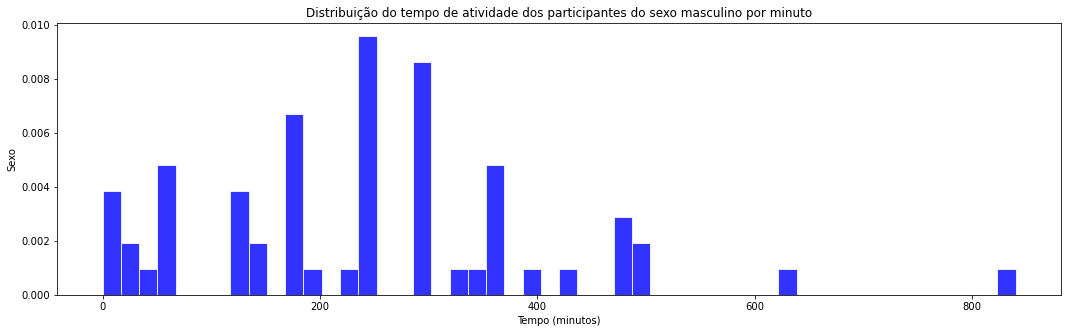

In [23]:
masculino = dados.loc[dados['Sexo'] == 'Masculino',:]

plt.figure(figsize=(18, 5))
plt.hist(masculino['Minutos'], bins=50, density=True,
color='blue', edgecolor='white',
linewidth=1, alpha=0.8)
plt.ylabel('Sexo')
plt.xlabel('Tempo (minutos)')
plt.title('Distribuição do tempo de atividade dos participantes do sexo masculino por minuto')

Text(0.5, 1.0, 'Distribuição do tempo de atividade dos participantes do sexo masculino por minuto')

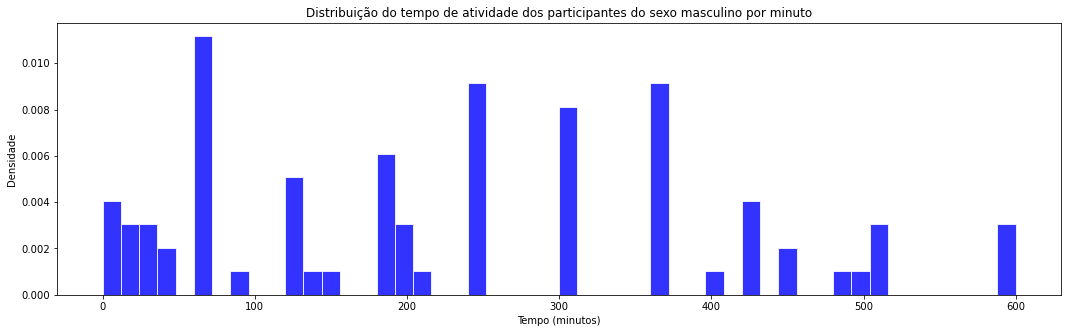

In [24]:
feminino = dados.loc[dados['Sexo'] == 'Feminino',:]

plt.figure(figsize=(18, 5))
plt.hist(feminino['Minutos'], bins=50, density=True,
color='blue', edgecolor='white',
linewidth=1, alpha=0.8)
plt.ylabel('Densidade')
plt.xlabel('Tempo (minutos)')
plt.title('Distribuição do tempo de atividade dos participantes do sexo masculino por minuto')

### A pandemia influenciou a sua prática de atividades físicas?

Acreditamos que não será necessária limpeza nessa variável pois representa algo pessoal das pessoas que participaram da nossa pesquisa.

In [25]:
dados.Influenciou.value_counts(True)

Sim    0.77931
Não    0.22069
Name: Influenciou, dtype: float64

<AxesSubplot:title={'center':'A pandemia influenciou a sua prática de atividades físicas?'}, ylabel='Influenciou'>

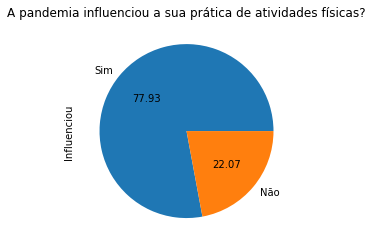

In [26]:
influenciou = dados.Influenciou.value_counts()
influenciou.plot(kind='pie', title='A pandemia influenciou a sua prática de atividades físicas?', autopct="%.2f")

### O que você fez para superar as barreiras que a pandemia impôs a prática de atividades físicas?

Acreditamos que não será necessária limpeza nessa variável pois representa algo pessoal das pessoas que participaram da nossa pesquisa.

In [27]:
dados.Superar.value_counts(True)

Comecei a fazer exercícios em casa                                 0.544828
Outros                                                             0.165517
Dei preferência a atividades individuais                           0.124138
Fiquei dependente à reabertura das academias                       0.096552
Consegui continuar com o mesmo plano de exercícios que já tinha    0.068966
Name: Superar, dtype: float64

<AxesSubplot:title={'center':'O que você fez para superar as barreiras que a pandemia impôs a prática de atividades físicas?'}, ylabel='Superar'>

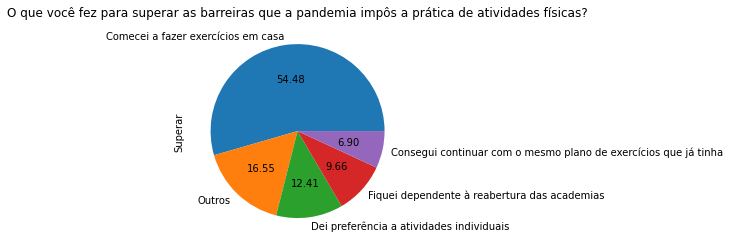

In [28]:
superar = dados.Superar.value_counts()
superar.plot(kind='pie', title='O que você fez para superar as barreiras que a pandemia impôs a prática de atividades físicas?', autopct="%.2f")

### Você sente a vontade de realizar atividades físicas em maior frequência?

Acreditamos que não será necessária limpeza nessa variável pois representa algo pessoal das pessoas que participaram da nossa pesquisa.

In [29]:
dados.Vontade.value_counts(True)

Sim       0.737931
Talvez    0.137931
Não       0.124138
Name: Vontade, dtype: float64

<AxesSubplot:title={'center':'Você sente a vontade de realizar atividades físicas em maior frequência?'}, ylabel='Vontade'>

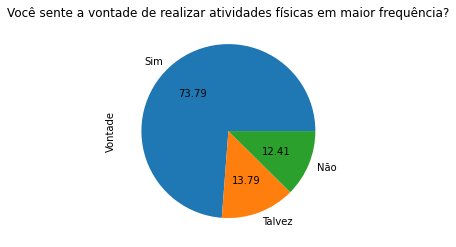

In [30]:
vontade = dados.Vontade.value_counts()
vontade.plot(kind='pie', title='Você sente a vontade de realizar atividades físicas em maior frequência?', autopct="%.2f")

# Modelos de Predição

## Regressão Linear

Regressão linear é um modelo linear que assume uma relação linear entre as variáveis de input (features) (x) e a variável única de output (target) (y). 

Mais especificamente, essa relação significa que y pode ser calculada a partir de uma combinação linear das variáveis de input.

Quando existe apenas 1 variável de input (x), ou feature, o método é chamado de Regressão Linear Simples. Quando existem diversas variáveis features, o método é normalmente chamado de Regressão Linear Multipla.

## Gráfico Feminino

In [31]:
xf = feminino['Idade']
yf = feminino['Minutos']

Xf_dados = sm.add_constant(xf)

In [32]:
modelf = sm.OLS(yf, Xf_dados)    

resultsf = modelf.fit()   

resultsf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutos   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1125
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.738
Time:                        10:24:23   Log-Likelihood:                -534.48
No. Observations:                  82   AIC:                             1073.
Df Residuals:                      80   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.3330     42.953      5.665      0.000     157.854     328.812
Idade         -0.3926      1.171     -0.335      0.738      -2.723       1.937
==============================================================================
Omnibus:                        6.920   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                4.418
Skew:                           0.404   Prob(JB):                        0.110
Kurtosis:                       2.200   Cond. No.                         86.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
bf0 = resultsf.params['const']
bf1 = resultsf.params['Idade']

print("Estimativa de beta0 (coeficente linear): {0}".format(bf0))
print("Estimativa de beta1 (coeficente angular): {0}".format(bf1))

Estimativa de beta0 (coeficente linear): 243.33295683302504
Estimativa de beta1 (coeficente angular): -0.3926139141154188


In [34]:
resultsf.predict

 

xf_vec = np.linspace(xf.min(), xf.max(), 500)
yf_vec = bf0 + bf1*xf_vec

## Gráfico masculino

In [35]:
xm = masculino['Idade']
ym = masculino['Minutos']

Xm_dados = sm.add_constant(xm)

In [36]:
modelm = sm.OLS(ym, Xm_dados)    

resultsm = modelm.fit()   

resultsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutos   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     8.694
Date:                Tue, 08 Jun 2021   Prob (F-statistic):            0.00454
Time:                        10:24:24   Log-Likelihood:                -398.99
No. Observations:                  62   AIC:                             802.0
Df Residuals:                      60   BIC:                             806.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        135.7217     41.906      3.239      0.002      51.898     219.546
Idade          3.4242      1.161      2.949      0.005       1.101       5.747
==============================================================================
Omnibus:                       14.915   Durbin-Watson:                   1.756
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.632
Skew:                           0.934   Prob(JB):                     5.46e-05
Kurtosis:                       5.027   Cond. No.                         77.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
bm0 = resultsm.params['const']
bm1 = resultsm.params['Idade']

print("Estimativa de beta0 (coeficente linear): {0}".format(bm0))
print("Estimativa de beta1 (coeficente angular): {0}".format(bm1))

Estimativa de beta0 (coeficente linear): 135.72167453286096
Estimativa de beta1 (coeficente angular): 3.4241575865535707


In [38]:
resultsm.predict

xm_vec = np.linspace(xm.min(), xm.max(), 500)
ym_vec = bm0 + bm1*xf_vec

## Gráfico maior de 28

In [39]:
xmaior = dados_maior28['Idade']
ymaior = dados_maior28['Minutos']

Xmaior_dados = sm.add_constant(xmaior)

In [40]:
modelmaior = sm.OLS(ymaior, Xmaior_dados)    

resultsmaior = modelmaior.fit()   

resultsmaior.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutos   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.239
Date:                Tue, 08 Jun 2021   Prob (F-statistic):              0.270
Time:                        10:24:25   Log-Likelihood:                -424.40
No. Observations:                  65   AIC:                             852.8
Df Residuals:                      63   BIC:                             857.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.7728    128.819      0.938      0.352    -136.651     378.197
Idade          2.8698      2.578      1.113      0.270      -2.282       8.022
==============================================================================
Omnibus:                        6.319   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                5.604
Skew:                           0.563   Prob(JB):                       0.0607
Kurtosis:                       3.896   Cond. No.                         308.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
bmaior0 = resultsmaior.params['const']
bmaior1 = resultsmaior.params['Idade']

print("Estimativa de beta0 (coeficente linear): {0}".format(bmaior0))
print("Estimativa de beta1 (coeficente angular): {0}".format(bmaior1))

Estimativa de beta0 (coeficente linear): 120.77283059714931
Estimativa de beta1 (coeficente angular): 2.8698177882013405


In [42]:
resultsmaior.predict

 

xmaior_vec = np.linspace(xmaior.min(), xmaior.max(), 500)
ymaior_vec = bmaior0 + bmaior1*xf_vec

## Grafico menor de 28 

In [43]:
xmenor = dados_menor28['Idade']
ymenor = dados_menor28['Minutos']

Xmenor_dados = sm.add_constant(xmenor)

In [44]:
model = sm.OLS(ymenor, Xmenor_dados)    

resultsmenor = model.fit()   

resultsmenor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutos   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     13.92
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           0.000360
Time:                        10:24:26   Log-Likelihood:                -511.44
No. Observations:                  80   AIC:                             1027.
Df Residuals:                      78   BIC:                             1032.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        708.6112    132.467      5.349      0.000     444.890     972.332
Idade        -25.8799      6.937     -3.731      0.000     -39.690     -12.070
==============================================================================
Omnibus:                        2.372   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.306   Jarque-Bera (JB):                2.338
Skew:                           0.366   Prob(JB):                        0.311
Kurtosis:                       2.592   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
bmenor0 = resultsmenor.params['const']
bmenor1 = resultsmenor.params['Idade']

print("Estimativa de beta0 (coeficente linear): {0}".format(bmenor0))
print("Estimativa de beta1 (coeficente angular): {0}".format(bmenor1))

Estimativa de beta0 (coeficente linear): 708.6112045760433
Estimativa de beta1 (coeficente angular): -25.8798788694482


In [46]:
resultsmenor.predict

 
xmenor_vec = np.linspace(xmenor.min(), xmenor.max(), 500)
ymenor_vec = bmenor0 + bmenor1*xf_vec


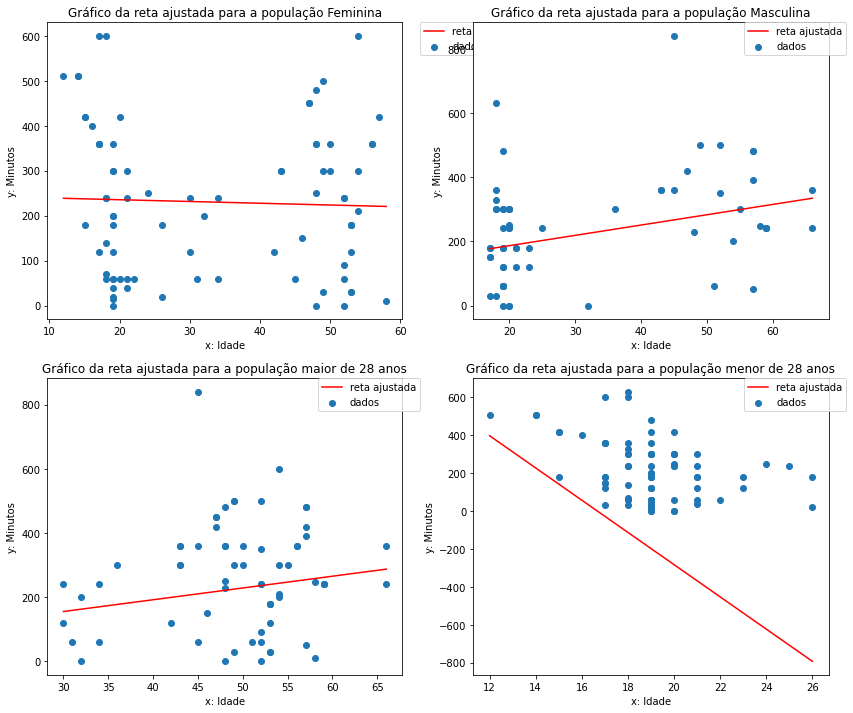

In [47]:
plt.figure(figsize=(14,12))

plt.subplot(221)
plt.plot(xf_vec,yf_vec, color="r") # resultados da regressão
plt.scatter(xf, yf); # dados
plt.title('Gráfico da reta ajustada para a população Feminina')
plt.xlabel("x: Idade")
plt.ylabel("y: Minutos")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.subplot(222)
plt.plot(xm_vec,ym_vec, color="r") # resultados da regressão
plt.scatter(xm, ym); # dados
plt.title('Gráfico da reta ajustada para a população Masculina')
plt.xlabel("x: Idade")
plt.ylabel("y: Minutos")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.subplot(223)
plt.plot(xmaior_vec,ymaior_vec, color="r") # resultados da regressão
plt.scatter(xmaior, ymaior); # dados
plt.title('Gráfico da reta ajustada para a população maior de 28 anos')
plt.xlabel("x: Idade")
plt.ylabel("y: Minutos")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.subplot(224)
plt.plot(xmenor_vec,ymenor_vec, color="r") # resultados da regressão
plt.scatter(xmenor, ymenor); # dados
plt.title('Gráfico da reta ajustada para a população menor de 28 anos')
plt.xlabel("x: Idade")
plt.ylabel("y: Minutos")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

##  Modelo Regressão Linear Múltipla

In [48]:
dados['Sexo_index'] = dados.Sexo.map({'Feminino':0,'Masculino':1, 'Outro':1})
dados['Ativa_index'] = dados.Ativa.map({'Não':0,'Sim':1,'Talvez':2})
dados['Influenciou_index'] = dados.Influenciou.map({'Não':0,'Sim':1 })
dados['Superar_index'] = dados. Superar.map({'Comecei a fazer exercícios em casa':0,'Dei preferência a atividades individuais':1,'Consegui continuar com o mesmo plano de exercícios que já tinha':2,'Fiquei dependente à reabertura das academias':3,'Outros':4})
dados['Vontade_index'] = dados.Vontade.map({'Não':0,'Sim':1,'Talvez':2})
dados.dropna()
dados

,Idade,Sexo,Ativa,Minutos,Influenciou,Superar,Vontade,Sexo_index,Ativa_index,Influenciou_index,Superar_index,Vontade_index
0,18,Feminino,Não,70,Sim,Comecei a fazer exercícios em casa,Talvez,0,0,1,0,2
1,17,Masculino,Talvez,30,Não,Outros,Sim,1,2,0,4,1
2,18,Masculino,Sim,300,Sim,Fiquei dependente à reabertura das academias,Sim,1,1,1,3,1
3,17,Feminino,Não,120,Sim,Comecei a fazer exercícios em casa,Sim,0,0,1,0,1
4,18,Feminino,Talvez,140,Sim,Comecei a fazer exercícios em casa,Não,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
163,17,Feminino,Sim,600,Sim,Comecei a fazer exercícios em casa,Talvez,0,1,1,0,2
164,43,Feminino,Sim,300,Sim,Comecei a fazer exercícios em casa,Não,0,1,1,0,0
165,56,Feminino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim,0,1,1,0,1
166,19,Feminino,Sim,200,Sim,Comecei a fazer exercícios em casa,Sim,0,1,1,0,1


In [49]:
Y = dados['Minutos']
X = dados[['Idade','Sexo_index', 'Ativa_index', 'Influenciou_index', 'Superar_index', 'Vontade_index']]


In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/3, random_state=101)


In [51]:
model = sm.OLS(y_train, X_train)    

results = model.fit()   

results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Minutos   R-squared (uncentered):                   0.757
Model:                            OLS   Adj. R-squared (uncentered):              0.741
Method:                 Least Squares   F-statistic:                              46.84
Date:                Tue, 08 Jun 2021   Prob (F-statistic):                    1.30e-25
Time:                        10:24:29   Log-Likelihood:                         -614.01
No. Observations:                  96   AIC:                                      1240.
Df Residuals:                      90   BIC:                                      1255.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Idade                 2.3185      0.763      3.037      0.003       0.802       3.835
Sexo_index           46.5482     31.779      1.465      0.146     -16.587     109.684
Ativa_index         126.7121     28.120      4.506      0.000      70.847     182.577
Influenciou_index    18.3080     32.198      0.569      0.571     -45.658      82.274
Superar_index       -27.3598      9.282     -2.947      0.004     -45.801      -8.919
Vontade_index        58.8751     28.279      2.082      0.040       2.694     115.057
==============================================================================
Omnibus:                        3.758   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                3.208
Skew:                           0.307   Prob(JB):                        0.201
Kurtosis:                       3.652   Cond. No.                         85.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
b0 = results.params[0] # Idade
b1 = results.params[1] # Sexo_index
b2 = results.params[2] # Ativa_index
b3 = results.params[3] # Influenciou_index
b4 = results.params[4] # Superar_index
b5 = results.params[5] # Vontade_index


In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [54]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Idade,0.716898
Sexo_index,36.664835
Ativa_index,106.225698
Influenciou_index,-23.896048
Superar_index,-36.736323
Vontade_index,19.518166


In [55]:
predictions = model.predict(X_test)


C:\Users\celin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Minutos'>

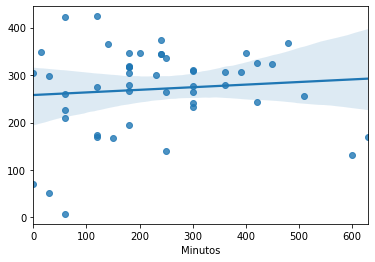

In [56]:
sns.regplot(y_test,predictions)

## Decision Tree

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
from sklearn import tree
model = tree.DecisionTreeClassifier()


In [76]:
dados['Minutos_index'] = '0'

In [77]:
def getCategory(row):
    if row['Minutos'] >= 150:
        return 1
    else:
        return 0

dados['Minutos_index'] = dados.apply(getCategory, axis=1)
dados

,Idade,Sexo,Ativa,Minutos,Influenciou,Superar,Vontade,Sexo_index,Ativa_index,Influenciou_index,Superar_index,Vontade_index,Premium,Minutos_index
0,18,Feminino,Não,70,Sim,Comecei a fazer exercícios em casa,Talvez,0,0,1,0,2,0,0
1,17,Masculino,Talvez,30,Não,Outros,Sim,1,2,0,4,1,0,0
2,18,Masculino,Sim,300,Sim,Fiquei dependente à reabertura das academias,Sim,1,1,1,3,1,0,1
3,17,Feminino,Não,120,Sim,Comecei a fazer exercícios em casa,Sim,0,0,1,0,1,0,0
4,18,Feminino,Talvez,140,Sim,Comecei a fazer exercícios em casa,Não,0,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,17,Feminino,Sim,600,Sim,Comecei a fazer exercícios em casa,Talvez,0,1,1,0,2,0,1
164,43,Feminino,Sim,300,Sim,Comecei a fazer exercícios em casa,Não,0,1,1,0,0,0,1
165,56,Feminino,Sim,360,Sim,Comecei a fazer exercícios em casa,Sim,0,1,1,0,1,0,1
166,19,Feminino,Sim,200,Sim,Comecei a fazer exercícios em casa,Sim,0,1,1,0,1,0,1


In [78]:
arvore = dados.drop(['Sexo', 'Ativa', 'Superar', 'Influenciou', 'Vontade'], axis = 'columns')
arvore

,Idade,Minutos,Sexo_index,Ativa_index,Influenciou_index,Superar_index,Vontade_index,Premium,Minutos_index
0,18,70,0,0,1,0,2,0,0
1,17,30,1,2,0,4,1,0,0
2,18,300,1,1,1,3,1,0,1
3,17,120,0,0,1,0,1,0,0
4,18,140,0,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
163,17,600,0,1,1,0,2,0,1
164,43,300,0,1,1,0,0,0,1
165,56,360,0,1,1,0,1,0,1
166,19,200,0,1,1,0,1,0,1


In [79]:
target = arvore['Minutos_index']

In [80]:
model.fit(arvore,target)

DecisionTreeClassifier()

In [82]:
model.score(arvore,target)

1.0

In [84]:
model.predict(arvore,target)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().